
Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


Attribute Information:

01 date : Date in MM-DD-YYYY 
02 day : Day of the Week 
03 quarter : A portion of the month. A month was divided into four quarters 
04 department : Associated department with the instance 
05 team_no : Associated team number with the instance 
06 no_of_workers : Number of workers in each team 
07 no_of_style_change : Number of changes in the style of a particular product 
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day. 
09 smv : Standard Minute Value, it is the allocated time for a task 
10 wip : Work in progress. Includes the number of unfinished items for products 
11 over_time : Represents the amount of overtime by each team in minutes 
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action. 
13 idle_time : The amount of time when the production was interrupted due to several reasons 
14 idle_men : The number of workers who were idle due to production interruption 
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1. 

• SMV = Basic Time + Allowance
• Basic Time = Observe Time x Rating Factor
• Observe Time = Total Cycle Time/Number of Cycle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
green = '#81b29a'
yellow= '#aec3b0'
blue = '#598392'
red = '#e07a5f'


In [3]:
df = pd.read_csv('Ass_1/garments_worker_productivity.csv')

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
df.isna().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [7]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [8]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

## Data cleansing

#### Remove space from the name of department

In [9]:
df['department'] = df['department'].apply(lambda x : x.strip())

#### Create column that displays the percentage of difference between the actual and targeted productivity levels.

In [10]:
df['gap'] = df['actual_productivity'] - df['targeted_productivity']

#### Remane day column to week_day

In [11]:
df.rename(columns={"day": "week_day"}, inplace=True)

#### Create columns for day, month and year

In [12]:
df['day'] = df['date'].apply(lambda x : int(x.split('/')[1]))
df['month'] = df['date'].apply(lambda x : int(x.split('/')[0]))
df['year'] = df['date'].apply(lambda x : int(x.split('/')[2]))

## 1. Does the individual teams’ actual productivity exceed their targeted productivity, and which team is the most/worst productive? 

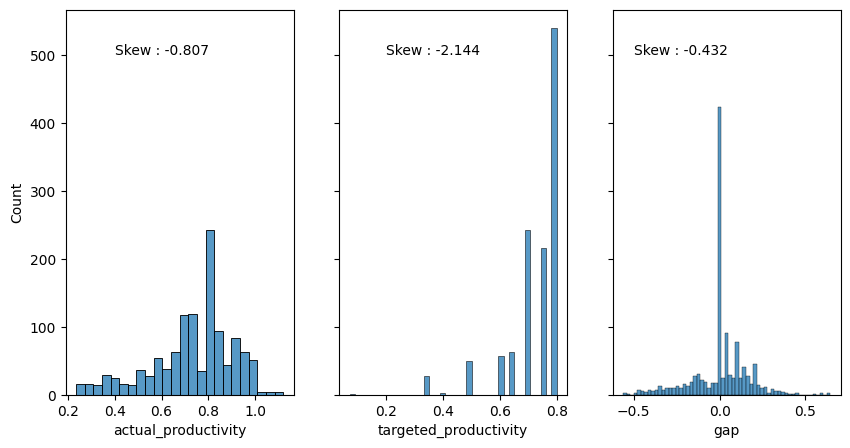

In [24]:
askew = df['actual_productivity'].skew()
tskew = df['targeted_productivity'].skew()
gskew = df['gap'].skew()
act_skew = f'Skew : {askew:0.3f}'
tar_skew = f'Skew : {tskew:0.3f}'
g_skew = f'Skew : {gskew:.3f}'

fig, ax = plt.subplots(1,3, sharey=True, figsize=(10,5))

sns.histplot(df['actual_productivity'], ax=ax[0],)
sns.histplot(df['targeted_productivity'], ax=ax[1])
sns.histplot(df['gap'], ax=ax[2])

ax[0].text(x=0.4,y=500, s=act_skew)
ax[1].text(x=0.2,y=500, s=tar_skew)
ax[2].text(x=-0.5,y=500, s=g_skew)

#plt.savefig('Pics/teams_a_vs_t_comp.png',bbox_inches='tight')

plt.show()

<AxesSubplot: >

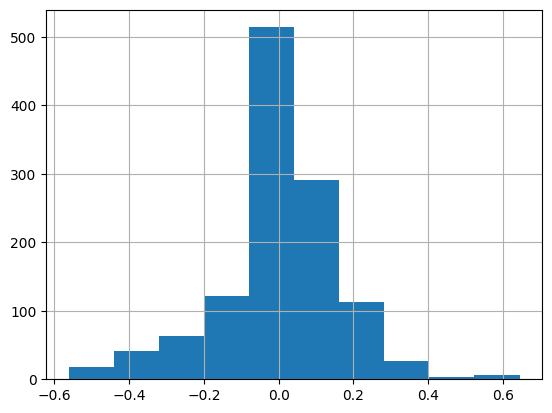

In [25]:
df['gap'].hist()

In [26]:
df['targeted_productivity'].skew()

-2.144150033252199

In [27]:
g = df.groupby(['team'])[['targeted_productivity','actual_productivity']].median()
g

,targeted_productivity,actual_productivity
team,,
1,0.80,0.850427
2,0.80,0.800238
3,0.80,0.800511
4,0.75,0.800393
5,0.70,0.700618
6,0.75,0.750651
7,0.75,0.682975
8,0.70,0.700135
9,0.80,0.754346


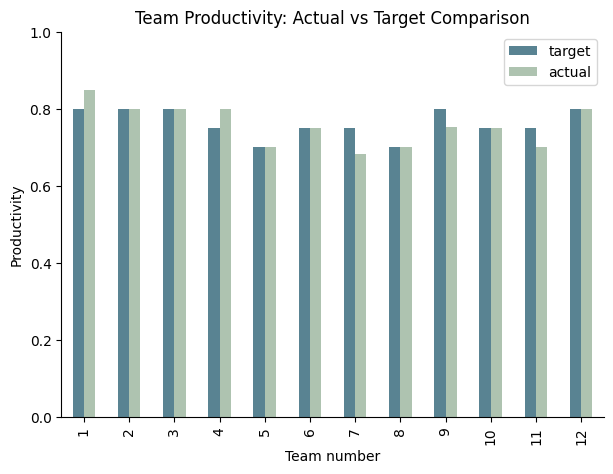

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))



g.plot(kind='bar',ax=ax, color=[blue,yellow])
ax.set_title('Team Productivity: Actual vs Target Comparison')
ax.set_ylim(0,1)
ax.set_xlabel('Team number')
ax.set_ylabel('Productivity')
ax.legend(['target','actual'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('Pics/teams_a_vs_t_comp.png',bbox_inches='tight')

plt.show()

In [29]:
df.head()

,date,quarter,department,week_day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,gap,day,month,year
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1,1,2015
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500,1,1,2015
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1,1,2015
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1,1,2015
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1,1,2015


#### Plot the percent difference between actual productivity and targeted productivity.

In [30]:
grouped_percent = df.groupby('team')['gap'].mean()
grouped_percent

team
1     0.074388
2     0.030947
3     0.061775
4     0.052416
5     0.024325
6    -0.045998
7    -0.046265
8    -0.034109
9    -0.023711
10   -0.018764
11   -0.021993
12    0.004813
Name: gap, dtype: float64

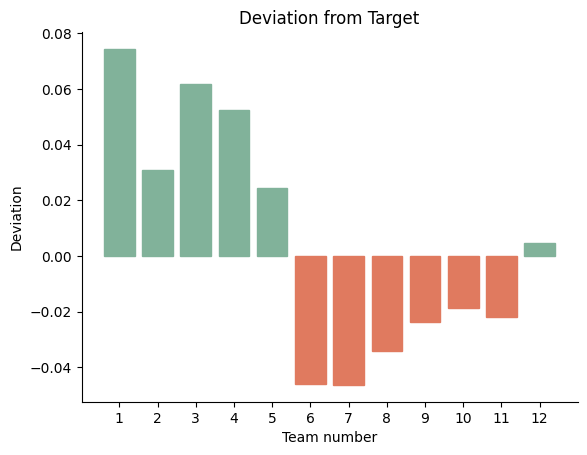

In [31]:
fig, ax = plt.subplots()

bars = ax.bar(grouped_percent.index, grouped_percent.values)

groups = grouped_percent.index.tolist()
ax.set_xticks(groups)
ax.set_xlabel('Team number')
ax.set_ylabel('Deviation')
ax.set_title('Deviation from Target')

for bar in bars:
    
    value = bar.get_height()
    
    if value > 0:
        color = green
       
    else:
        color = red
    
    bar.set_color(color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('deviation.png',bbox_inches='tight')
        
plt.show()
  

#### Get the number of the best team with the highest positive gap.

In [32]:
grouped_percent.idxmax()

1

#### Get the number of the worst team with the lowerst negative gap.

In [33]:
grouped_percent.idxmin()

7

## 2. Which of the two garment production processes (i.e., sewing and finishing) is the hardest?

In [34]:
smv_grouped = df.groupby(['department'])['smv'].mean()

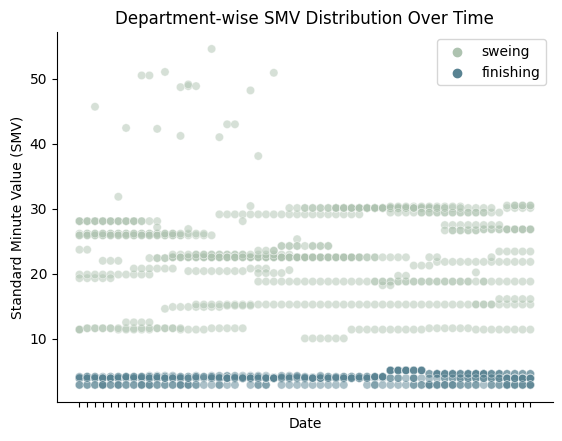

In [35]:
fig, ax = plt.subplots()
palette ={'sweing':yellow, 'finishing':blue}
sns.scatterplot(df, x='date', y='smv', hue='department', palette=palette , alpha=0.5)


ax.set_xlabel('Date')
ax.set_ylabel('Standard Minute Value (SMV)')
ax.set_xticklabels([])
ax.set_title('Department-wise SMV Distribution Over Time')
ax.legend()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('smv_distr.png',bbox_inches='tight')
    

plt.show()

## 3. Which of the days is mostly the rest day for the workers and how does the resting affect their productivity afterwards?


In [36]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [37]:
g = df.groupby(['week_day','department'])[['idle_time']].mean().unstack()
g.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday']
g

idle_time          
department finishing    sweing
Monday           0.0  0.017241
Tuesday          0.0  5.480769
Wednesday        0.0  0.150862
Thursday         0.0  0.105932
Saturday         0.0  0.165254
Sunday           0.0  2.121849

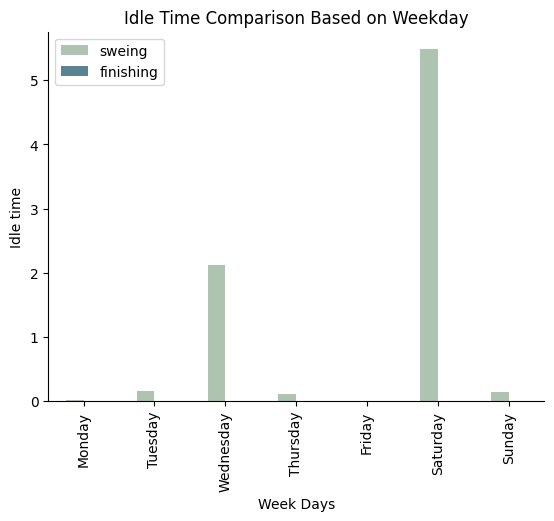

In [38]:
inc_grouped = df.groupby(['week_day','department'], sort=False)[['idle_time']].mean().unstack()
inc_grouped = inc_grouped.reindex(week_days)

fig, ax = plt.subplots()

inc_grouped.plot(kind='bar', ax=ax, color=[yellow,blue])

ax.set_xlabel('Week Days')
ax.set_ylabel('Idle time')
ax.set_title('Idle Time Comparison Based on Weekday')

ax.legend(['sweing','finishing'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('idle_days.png',bbox_inches='tight')

plt.show()

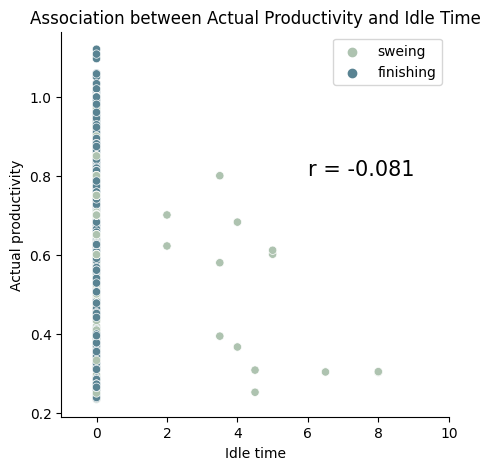

In [39]:
fig, ax = plt.subplots(figsize=((5,5)))

corr = df['idle_time'].corr(df['actual_productivity'])
corr_text = f'r = {corr:0.3f}'

palette ={'sweing':yellow, 'finishing':blue}

sns.scatterplot(df, x='idle_time', y ='actual_productivity', hue='department', palette=palette, ax=ax)

ax.set_ylabel('Actual productivity')
ax.set_xlabel('Idle time')
ax.set_title('Association between Actual Productivity and Idle Time')
ax.set_xlim(-1,10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(6,0.8,corr_text,fontsize=15)
ax.legend()

plt.savefig('idle_product.png',bbox_inches='tight')

plt.show()

#### Get correlation 

In [40]:
df[df['department']=='sweing']['idle_time'].corr(df['actual_productivity'])

-0.11373692461403712

## 4. When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives? 

#### Get mean values of incentive by depatrment

In [41]:
df.groupby(['department'])[['incentive']].sum()

,incentive
department,
finishing,15000
sweing,30738


In [42]:
df.groupby(['department','quarter'])[['incentive']].sum()

incentive
department quarter            
finishing  Quarter1          0
           Quarter2      15000
           Quarter3          0
           Quarter4          0
           Quarter5          0
sweing     Quarter1       9882
           Quarter2       8360
           Quarter3       4881
           Quarter4       6155
           Quarter5       1460

In [43]:
months = list(range(1,5))
m_grouped = df.groupby(['month','department'], sort=False)[['incentive']].sum().unstack()
m_grouped = m_grouped.reindex(months)
m_grouped

incentive          
department    sweing finishing
month                         
1            15315.0       0.0
2            10827.0       0.0
3             4596.0   15000.0
4                NaN       NaN

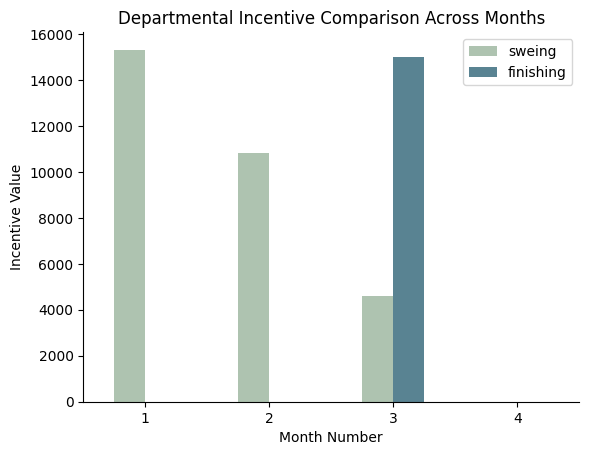

In [44]:
fig, ax = plt.subplots()

m_grouped.plot(kind='bar', ax = ax, color=[yellow,blue])

ax.set_xlabel('Month Number')
ax.set_ylabel('Incentive Value')
ax.set_title('Departmental Incentive Comparison Across Months')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.legend(['sweing','finishing'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('month_incentive.png',bbox_inches='tight')

plt.show()


In [45]:
inc_grouped = df.groupby(['quarter','department'])[['incentive']].sum().unstack()

inc_grouped.index =[1,2,3,4,5]
inc_grouped

incentive       
department finishing sweing
1                  0   9882
2              15000   8360
3                  0   4881
4                  0   6155
5                  0   1460

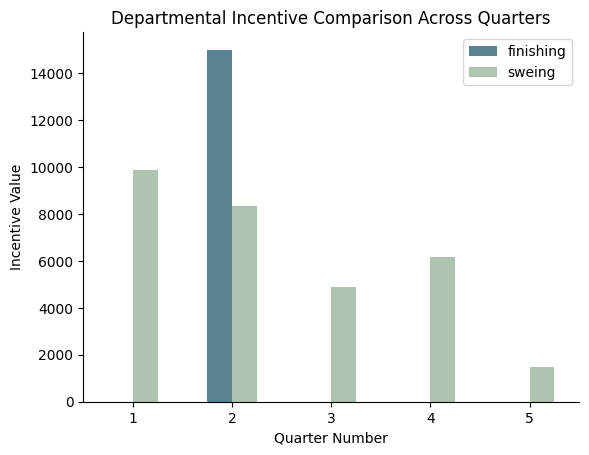

In [46]:
fig, ax = plt.subplots()

inc_grouped.plot(kind='bar', ax=ax, color=[blue,yellow])

ax.set_xlabel('Quarter Number')
ax.set_ylabel('Incentive Value')
ax.set_title('Departmental Incentive Comparison Across Quarters')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.legend(['finishing','sweing'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('quarter_incentive.png',bbox_inches='tight')

plt.show()

In [47]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
iw_grouped = df.groupby(['week_day','department'], sort=False)[['incentive']].sum().unstack()
iw_grouped = iw_grouped.reindex(week_days)
iw_grouped 

incentive          
department    sweing finishing
week_day                      
Monday        4953.0   15000.0
Tuesday       5375.0       0.0
Wednesday     5313.0       0.0
Thursday      5206.0       0.0
Friday           NaN       NaN
Saturday      4985.0       0.0
Sunday        4906.0       0.0

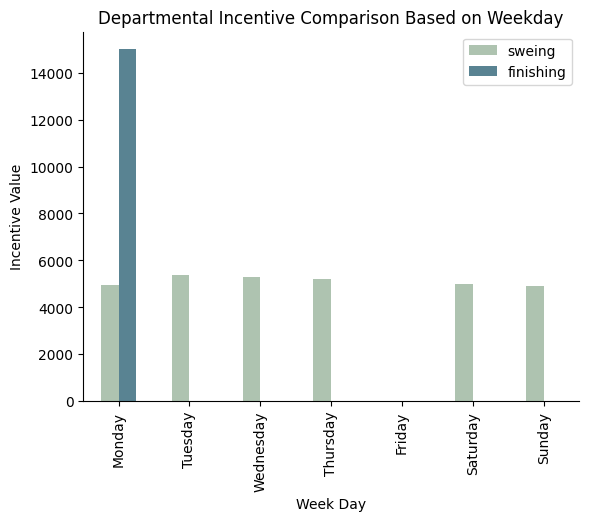

In [48]:
fig, ax = plt.subplots()

iw_grouped.plot(kind='bar', ax=ax ,color=[yellow,blue])

ax.set_xlabel('Week Day')
ax.set_ylabel('Incentive Value')
ax.set_title('Departmental Incentive Comparison Based on Weekday')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.legend(['sweing','finishing'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('weekday_incentive.png',bbox_inches='tight')

plt.show()


In [49]:

days = list(range(1,32))
d_grouped = df.groupby(['day','department'], sort=False)[['incentive']].sum().unstack()
d_grouped = d_grouped.reindex(days)
d_grouped

incentive          
department    sweing finishing
day                           
1             1623.0       0.0
2             1088.0       0.0
3             1687.0       0.0
4             1614.0       0.0
5             1581.0       0.0
6              589.0       0.0
7             1700.0       0.0
8             1748.0       0.0
9             1008.0   15000.0
10            1788.0       0.0
11            1580.0       0.0
12             879.0       0.0
13             557.0       0.0
14             800.0       0.0
15             734.0       0.0
16             301.0       0.0
17             878.0       0.0
18             861.0       0.0
19             938.0       0.0
20             555.0       0.0
21             614.0       0.0
22             855.0       0.0
23             369.0       0.0
24            1101.0       0.0
25            1106.0       0.0
26             978.0       0.0
27             623.0       0.0
28            1123.0       0.0
29             718.0       0.0
30               NaN       NaN
31             742.0       0.0

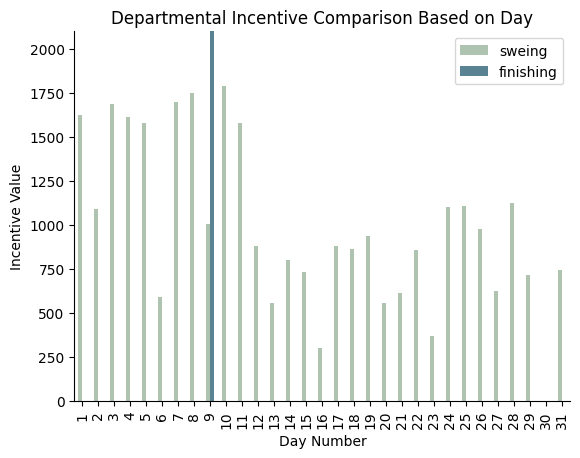

In [50]:
fig, ax = plt.subplots()


d_grouped.plot(kind='bar', ax=ax, color=[yellow,blue])

ax.set_xlabel('Day Number')
ax.set_ylabel('Incentive Value')
ax.set_title('Departmental Incentive Comparison Based on Day')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.legend(['sweing','finishing'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(0,2100)

plt.savefig('day_incentive.png',bbox_inches='tight')

plt.show()




## Is there a correlation between the number of workers and the actual productivity delivered?

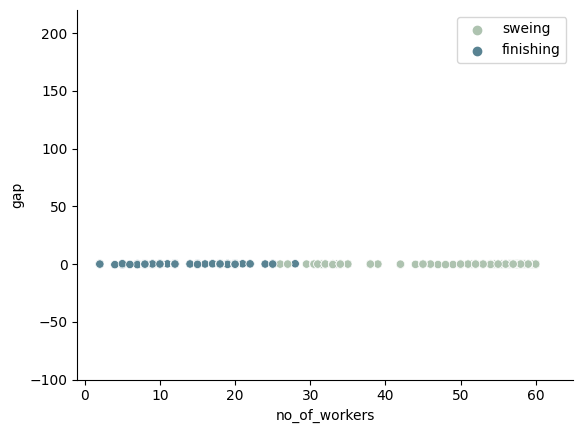

In [51]:
fig, ax = plt.subplots()
palette ={'sweing':yellow, 'finishing':blue}

sns.scatterplot(df, x='no_of_workers',y ='gap',hue='department', ax = ax, palette=palette)

ax.set_xlim(-1,65)
ax.set_ylim(-100,220)
ax.legend()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [52]:
df.groupby('department')['no_of_workers'].corr(df['gap'])

department
finishing    0.262525
sweing       0.077445
Name: no_of_workers, dtype: float64

In [53]:
df['no_of_workers'].corr(df['gap'])

-0.011666724097051587

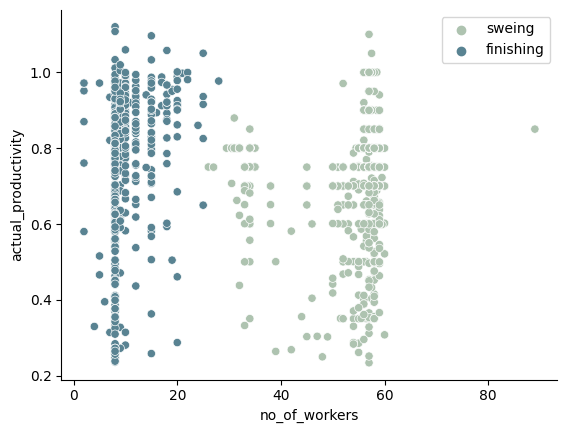

In [54]:
fig, ax = plt.subplots()
palette ={'sweing':yellow, 'finishing':blue}

sns.scatterplot(df, x='no_of_workers',y ='actual_productivity',hue='department', ax=ax ,palette=palette)
ax.legend()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

In [ ]:
df['no_of_workers'].corr(df['actual_productivity'])

In [ ]:
df.groupby('department')['no_of_workers'].corr(df['actual_productivity'])

In [ ]:
df.tail()

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(df,x='incentive',y='actual_productivity',hue='department',ax = ax)
ax.set_xlim(-10,150)

In [ ]:
df.groupby('department')['incentive'].corr(df['actual_productivity'])

In [ ]:
import seaborn as sns

#
# Correlation between different variables
#
corr = df.groupby('department').corr(numeric_only=True)
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

plt.show()